In [1]:
import pandas as p
import numpy as n

In [2]:
df = p.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [3]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

Q1.There's one column with missing values. What is it?

'engine_displacement'
'horsepower'
'vehicle_weight'
'model_year'

Ans: Horsepower

The column with missing values are num_cylinders, horsepower,acceleration and num_doors

Q2.What's the median (50% percentile) for variable 'horsepower'?
Ans:149

In [4]:
df.horsepower.median()

np.float64(149.0)

<Axes: title={'center': 'Fuel Efficiency of cars'}, xlabel='Fuel Efficiency', ylabel='Number Of cars'>

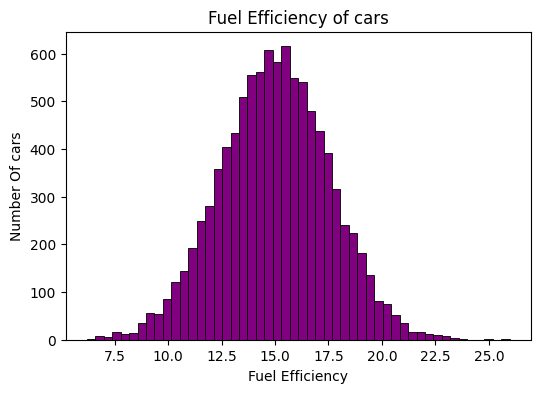

In [5]:
import seaborn as s
import matplotlib.pyplot as plot
string_dtype_columns = list(df.dtypes[df.dtypes == object].index)
for col in string_dtype_columns:
    df[col]= df[col].str.lower().str.replace(" ","_")
df.head()

plot.figure(figsize=(6,4))
plot.title("Fuel Efficiency of cars")
plot.ylabel("Number Of cars")
plot.xlabel("Fuel Efficiency")
s.histplot(df.fuel_efficiency_mpg,bins=50,color='purple',alpha=1)

In [6]:
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,europe,gasoline,all-wheel_drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,usa,gasoline,front-wheel_drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,europe,gasoline,front-wheel_drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,usa,diesel,all-wheel_drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,europe,gasoline,all-wheel_drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,europe,diesel,front-wheel_drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,usa,gasoline,all-wheel_drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,usa,diesel,all-wheel_drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,usa,diesel,front-wheel_drive,1.0,15.331551


Split the datasets into training(60%),validation(20%) and testing(20%) datasets

In [7]:
Total_datasets=len(df)
Testing_Dataset_count=int(0.2*Total_datasets)
Validation_Dataset_Count=int(0.2*Total_datasets)
Train_Dataset_Count = Total_datasets - Testing_Dataset_count- Validation_Dataset_Count
Total_datasets,Testing_Dataset_count,Validation_Dataset_Count,Train_Dataset_Count


(9704, 1940, 1940, 5824)

In [8]:
base = ['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']
df=df[base]
df.isnull().sum()
#df['fuel_efficiency_mpg'].skew()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

Use only the following columns:

'engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
'fuel_efficiency_mpg'




In [9]:

def split_datasets(seed_value):
    index=n.arange(Total_datasets)
    n.random.seed(seed_value)
    #print("seed value =",seed_value)
    n.random.shuffle(index)
    df_train = df.iloc[index[:Train_Dataset_Count]]
    df_train =df_train.reset_index(drop=True)
    df_val=df.iloc[index[Train_Dataset_Count:Train_Dataset_Count+Validation_Dataset_Count]]
    df_val=df_val.reset_index(drop=True)
    df_test=df.iloc[index[Train_Dataset_Count+Validation_Dataset_Count:]]
    df_test =df_test.reset_index(drop=True)
    y_train=df_train.fuel_efficiency_mpg.values
    y_val=df_val.fuel_efficiency_mpg.values
    y_test=df_test.fuel_efficiency_mpg.values
    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']
    return df_train,df_val,df_test,y_train,y_val,y_test


Q3. Build linear regression model by filling null values with 0

In [10]:

def prepare_X(df,fill_with_Number):
    df_copy = df.copy()
    df_copy = df_copy.fillna(fill_with_Number)
    X= df_copy.values
    return X




In [11]:
df_train,df_val,df_test,y_train,y_val,y_test=split_datasets(42)
X_train = prepare_X(df_train,0)
X_val = prepare_X(df_val,0)

def train_linear_regression_model(X,y):
    ones = n.ones(X.shape[0])
    X = n.column_stack([ones,X])
    XTX = X.T.dot(X)
    XTX_inv = n.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:] 

w0,w = train_linear_regression_model(X_train,y_train)
y_train_pred = w0 + X_train.dot(w)

y_val_pred = w0+ X_val.dot(w)




<Axes: ylabel='Count'>

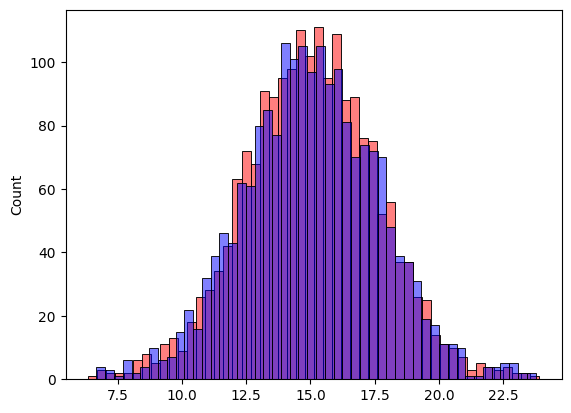

In [12]:
s.histplot(y_val_pred, color='red', alpha=0.5, bins=50)
s.histplot(y_val, color='blue', alpha=0.5, bins=50)

<Axes: ylabel='Count'>

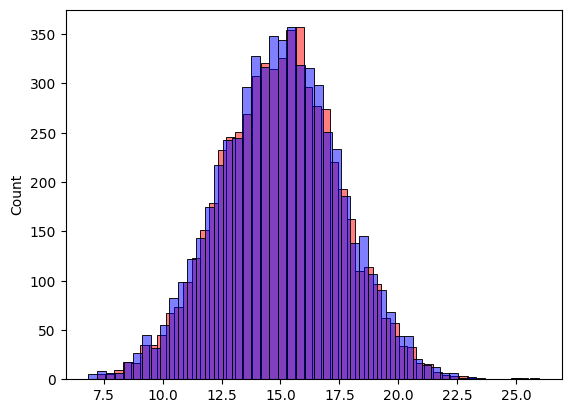

In [13]:
s.histplot(y_train_pred, color='red', alpha=0.5, bins=50)
s.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [14]:
def calculate_rmse(actual_val,pred_val):
    se = (actual_val-pred_val)**2
    mse = se.mean()
    return n.sqrt(mse)


In [15]:
rmse_val =calculate_rmse(y_val,y_val_pred)
n.round(rmse_val,2)

np.float64(0.52)

Q3. second part , build linear regression by filling empty values with mean of the column


Ans: Mean is good as it has lesser rmse

In [ ]:
X_trainM = prepare_X(df_train,df_train.mean())
X_valM = prepare_X(df_val,df_train.mean())
z0,z = train_linear_regression_model(X_trainM,y_train)
y_val_predM = z0+ X_valM.dot(z)
rmse_valM =calculate_rmse(y_val,y_val_predM)
print(n.round(rmse_valM,2))

0.46


Q4.Regularised linear regression

ans: best r=0.01 rmse error is 0.51711

In [17]:
def train_linear_regression_model_reg(X,y,r=0.001):
    ones=n.ones(X.shape[0])
    X = n.column_stack([ones,X])
    XTX = X.T.dot(X)
    XTX = XTX + r* n.eye(XTX.shape[0])
    XTX_inv = n.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0],w_full[1:]

for r in [0, 0.01,0.1, 1, 5, 10, 100]:
    X_train = prepare_X(df_train,0)
    w0,w = train_linear_regression_model_reg(X_train,y_train,r)
    X_val = prepare_X(df_val,0)
    y_val_pred =w0+X_val.dot(w)
    score = calculate_rmse(y_val,y_val_pred)
    print(r,score,w0)

0 0.5173782638841185 28.827365474598718
0.01 0.5171115525775559 24.926838421084422
0.1 0.5187525130701629 11.239661085047366
1 0.5222348802092528 1.7315979412398264
5 0.5228916092823455 0.36380750207153073
10 0.5229812979636569 0.18306246622476907
100 0.5230636233819926 0.01841801730804525


Q5.Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 

In [18]:
rmse =[]
for seed in [0,1,2,3,4,5,6,7,8,9]:
    df_train,df_val,df_test,y_train,y_val,y_test=split_datasets(seed)
    X_train = prepare_X(df_train,0)
    w0,w = train_linear_regression_model(X_train,y_train)
    X_val = prepare_X(df_val,0)
    y_val_pred =w0+X_val.dot(w)
    score = calculate_rmse(y_val,y_val_pred)
    print(score,w0)
    rmse.append(score)

#print(rmse)
std = n.std(rmse)
print("standard deviation = ",std)
round(std,3)

0.5206531296297207 27.376388746129475
0.5213388912866506 29.022468555840756
0.5228069974913666 25.904357611918527
0.5159516741255491 28.015450068187377
0.5109129460116937 25.93400040714799
0.5283406460212935 25.89950696140074
0.5313910658190373 25.91723093394924
0.509067038739038 28.414324731359304
0.5147399129482789 26.47841782776404
0.513186590829269 27.513852582351465
standard deviation =  0.006989446427824928


np.float64(0.007)

Q6.Testing the model

In [19]:
df_train,df_val,df_test,y_train,y_val,y_test=split_datasets(9)
df_fulltrain = p.concat([df_train,df_val])
X_fulltrain = prepare_X(df_fulltrain,0)
y_fulltrain=n.concatenate([y_train,y_val])
X_test =prepare_X(df_test,0)
w0,w = train_linear_regression_model_reg(X_fulltrain,y_fulltrain,0.001)
y_test_pred = w0 +X_test.dot(w)
calculate_rmse(y_test,y_test_pred)


np.float64(0.5156261299185628)